In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten
import os
import matplotlib.pyplot as plt

In [ ]:
os.listdir('/content/drive/MyDrive/Covid19-dataset/train')


['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
os.listdir('/content/drive/MyDrive/Covid19-dataset/test')

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
datadir='/content/drive/MyDrive/Covid19-dataset/train'

In [ ]:
X_train=[]
y_train=[]

categories=['Covid', 'Normal', 'Viral Pneumonia']

for i in categories:
  print('loading category....',i)
  path=os.path.join(datadir,i)
  # print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    #print(imgpath)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
  print('loaded category......',i)



loading category.... Covid
loaded category...... Covid
loading category.... Normal
loaded category...... Normal
loading category.... Viral Pneumonia
loaded category...... Viral Pneumonia


In [ ]:
datadir='/content/drive/MyDrive/Covid19-dataset/test'

In [ ]:
X_test=[]
y_test=[]

categories=['Covid', 'Normal', 'Viral Pneumonia']

for i in categories:
  print('loading category....',i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    #print(imgpath)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(150,150,1))
    X_test.append(img_resized)
    y_test.append(categories.index(i))
  print('loaded category...',i)


loading category.... Covid
loaded category... Covid
loading category.... Normal
loaded category... Normal
loading category.... Viral Pneumonia
loaded category... Viral Pneumonia


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((251, 150, 150, 1), (251,), (66, 150, 150, 1), (66,))

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))                 #32=no. of filter and 3,3 is its shape
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
8/8 [==============================] - 9s 936ms/step - loss: 7.1723 - accuracy: 0.4143
Epoch 2/10
8/8 [==============================] - 6s 750ms/step - loss: 1.0492 - accuracy: 0.6693
Epoch 3/10
8/8 [==============================] - 7s 835ms/step - loss: 0.4833 - accuracy: 0.8287
Epoch 4/10
8/8 [==============================] - 7s 868ms/step - loss: 0.2861 - accuracy: 0.9004
Epoch 5/10
8/8 [==============================] - 6s 759ms/step - loss: 0.2039 - accuracy: 0.9402
Epoch 6/10
8/8 [==============================] - 7s 874ms/step - loss: 0.1595 - accuracy: 0.9363
Epoch 7/10
8/8 [==============================] - 6s 722ms/step - loss: 0.1105 - accuracy: 0.9562
Epoch 8/10
8/8 [==============================] - 8s 1s/step - loss: 0.0809 - accuracy: 0.9801
Epoch 9/10
8/8 [==============================] - 6s 701ms/step - loss: 0.0712 - accuracy: 0.9880
Epoch 10/10
8/8 [==============================] - 7s 915ms/step - loss: 0.0617 - accuracy: 0.9761


In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print('loss:',loss)
print('accuracy:',accuracy)

3/3 [==============================] - 1s 98ms/step - loss: 0.3765 - accuracy: 0.9091
loss: 0.37648195028305054
accuracy: 0.9090909361839294


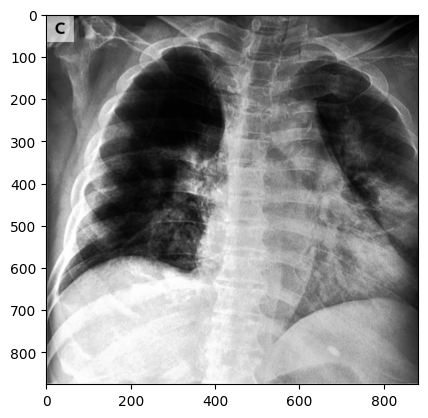

In [ ]:
img=imread('/content/drive/MyDrive/Covid19-dataset/test/Covid/0106.jpeg')
plt.imshow(img)

In [ ]:
img=resize(img,(150,150,1))
img

array([[[0.79548664],
        [0.65613822],
        [0.65742292],
        ...,
        [0.01214548],
        [0.01214905],
        [0.01826221]],

       [[0.80297317],
        [0.66835009],
        [0.67373458],
        ...,
        [0.0061307 ],
        [0.01087811],
        [0.0171296 ]],

       [[0.81529312],
        [0.68191546],
        [0.69603543],
        ...,
        [0.03032114],
        [0.01662195],
        [0.01542538]],

       ...,

       [[0.60166646],
        [0.4296661 ],
        [0.58707526],
        ...,
        [0.30647542],
        [0.29451806],
        [0.27028425]],

       [[0.60320686],
        [0.41988602],
        [0.59294221],
        ...,
        [0.30763246],
        [0.28806807],
        [0.2690722 ]],

       [[0.62815687],
        [0.46153083],
        [0.65976084],
        ...,
        [0.34535943],
        [0.32428013],
        [0.30265802]]])

In [ ]:
img1=img.reshape(1,150,150,1)
img1.shape

(1, 150, 150, 1)

In [ ]:
y_new=model.predict(img1)
ind=y_new.argmax()
print(categories[ind])

1/1 [==============================] - 0s 173ms/step
Covid


In [ ]:
import pickle
filename='Covid_classification.pkl'
pickle.dump(model,open(filename,'wb'))

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
!wget -q -O - - ipv4.icanhazip.com

35.185.27.190


In [ ]:
!streamlit run covid_app.py & npx localtunnel --port 8501

  Stopping...
^C
